# Loading dataset & Importing essential modules

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the file path to the CSV file inside the dataset
file_path = "smartphones.csv"

# Load the dataset into a DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "abhijitdahatonde/real-world-smartphones-dataset",
    file_path
)


/tmp/ipython-input-2-1221304666.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Understanding Datset

In [12]:
df.head(10)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170
5,apple,Apple iPhone 12 (256GB),67999,7.6,1,bionic,6.0,3.10,NaN,0,...,256,6.1,60,2,ios,12.0,12.0,0,2532,1170
6,apple,Apple iPhone 12 Mini,40999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,5.4,60,2,ios,12.0,12.0,0,2340,1080
7,apple,Apple iPhone 12 Mini (128GB),45999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,5.4,60,2,ios,12.0,12.0,0,2340,1080
8,apple,Apple iPhone 12 Mini (256GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,256,5.4,60,2,ios,12.0,12.0,0,2340,1080
9,apple,Apple iPhone 12 Pro (256GB),119900,8.0,1,bionic,6.0,3.10,NaN,0,...,256,6.1,60,3,ios,12.0,12.0,0,2532,1170


In [13]:
df.tail(10)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
970,xiaomi,Xiaomi Redmi Note 13 Pro Max 5G,20499,8.3,1,snapdragon,8.0,2.36,5200.0,1,...,128,6.67,120,4,android,108.0,32.0,1,2460,1080
971,xiaomi,Xiaomi Redmi Note 4,10300,6.5,0,snapdragon,8.0,2.00,4100.0,0,...,64,5.50,60,1,android,13.0,5.0,1,1920,1080
972,xiaomi,Xiaomi Redmi Note 8 2021,9990,7.5,0,helio,8.0,2.00,4000.0,1,...,64,6.30,60,4,android,48.0,13.0,1,2340,1080
973,xiaomi,Xiaomi Redmi Note 8 Pro,16999,7.8,0,helio,8.0,2.05,4500.0,1,...,64,6.53,60,4,android,64.0,20.0,1,2340,1080
974,xiaomi,Xiaomi Redmi Note 9,11989,7.5,0,helio,8.0,2.00,5020.0,1,...,64,6.53,60,4,android,48.0,13.0,1,2340,1080
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080
979,zte,ZTE Axon 40 Ultra 5G,61990,8.9,1,snapdragon,8.0,3.00,5000.0,1,...,128,6.80,120,3,android,64.0,16.0,0,2480,1116


In [62]:
df[df['model']=='Samsung Galaxy S20 5G']

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,total_camera,ram_speed_combo
656,samsung,Samsung Galaxy S20 5G,74999,8.9,1,exynos,8.0,2.73,4000.0,1,...,60,3,android,64.0,10.0,1,3200,1440,74.0,21.84


In [14]:
df.shape

(980, 22)

In [15]:
print(df.describe)

<bound method NDFrame.describe of     brand_name                                      model   price  avg_rating  \
0        apple                            Apple iPhone 11   38999         7.3   
1        apple                    Apple iPhone 11 (128GB)   46999         7.5   
2        apple                    Apple iPhone 11 Pro Max  109900         7.7   
3        apple                            Apple iPhone 12   51999         7.4   
4        apple                    Apple iPhone 12 (128GB)   55999         7.5   
..         ...                                        ...     ...         ...   
975     xiaomi                    Xiaomi Redmi Note 9 Pro   13999         7.5   
976     xiaomi  Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB)   14439         7.7   
977     xiaomi                Xiaomi Redmi Note 9 Pro Max   16490         8.0   
978        zte                               ZTE Axon 30S   19999         8.2   
979        zte                       ZTE Axon 40 Ultra 5G   61990         8

# Handling Missing Values

In [16]:
df.isna().sum()

,0
brand_name,0
model,0
price,0
avg_rating,101
5G_or_not,0
processor_brand,20
num_cores,6
processor_speed,42
battery_capacity,11
fast_charging_available,0


In [17]:
df = df.dropna(subset=['processor_brand', 'os', 'battery_capacity'])

In [46]:
df['avg_rating'] = df['avg_rating'].fillna(df['avg_rating'].median())

df['num_cores'] = df['num_cores'].fillna(df['num_cores'].mode()[0])

df['processor_speed'] = df['processor_speed'].fillna(df['processor_speed'].mean())

df['fast_charging'] = df['fast_charging'].fillna(df['fast_charging'].mode()[0])

df['primary_camera_front'] = df['primary_camera_front'].ffill()



In [47]:
df.isna().any()

,0
brand_name,False
model,False
price,False
avg_rating,False
5G_or_not,False
processor_brand,False
num_cores,False
processor_speed,False
battery_capacity,False
fast_charging_available,False


# Analysis based on Brand & Model

In [48]:
# Checking out total brands
print("List of Brands:")
for i in df['brand_name'].unique():
    print(i,end=", ")
    if i == 'lyf':
        print()

print("\n\nTotal Brands:",len(df['brand_name'].unique()))

List of Brands:
apple, asus, blackview, blu, cola, doogee, duoqin, gionee, google, honor, huawei, infinix, iqoo, itel, jio, lava, leeco, leitz, lenovo, letv, lg, lyf, 
micromax, motorola, nokia, nothing, nubia, oneplus, oppo, oukitel, poco, realme, redmi, samsung, sharp, sony, tcl, tecno, vertu, vivo, xiaomi, zte, 

Total Brands: 42


In [49]:
# Top 5 popular Brands loved by Users
top_rated = df.sort_values(by='avg_rating', ascending=False)['brand_name'].unique()[:5]
print(top_rated)

['samsung' 'sony' 'tecno' 'realme' 'oppo']


In [22]:
# High rated models from top brands
top_rated_models = df[['brand_name', 'model', 'avg_rating']].sort_values(by='avg_rating', ascending=False).head(13)
top_rated_models.set_index(['brand_name','model']).drop('avg_rating',axis=1)

Empty DataFrame
Columns: []
Index: [(samsung, Samsung Galaxy S20 5G), (samsung, Samsung Galaxy Note 10 Plus), (samsung, Samsung Galaxy Note 10 Plus 5G), (samsung, Samsung Galaxy S23 Plus), (samsung, Samsung Galaxy Z Fold 3), (samsung, Samsung Galaxy A53 (8GB RAM + 256GB)), (samsung, Samsung Galaxy A53 5G (8GB RAM + 128GB)), (sony, Sony Xperia 1 II), (sony, Sony Xperia 5 IV 5G), (tecno, Tecno Phantom X2 Pro), (realme, Realme GT 2 Pro 5G), (realme, Realme GT 2 Pro 5G (12GB RAM + 256GB)), (oppo, Oppo Find X6)]

<Axes: title={'center': 'Brands by Number of Models'}, xlabel='brand_name'>

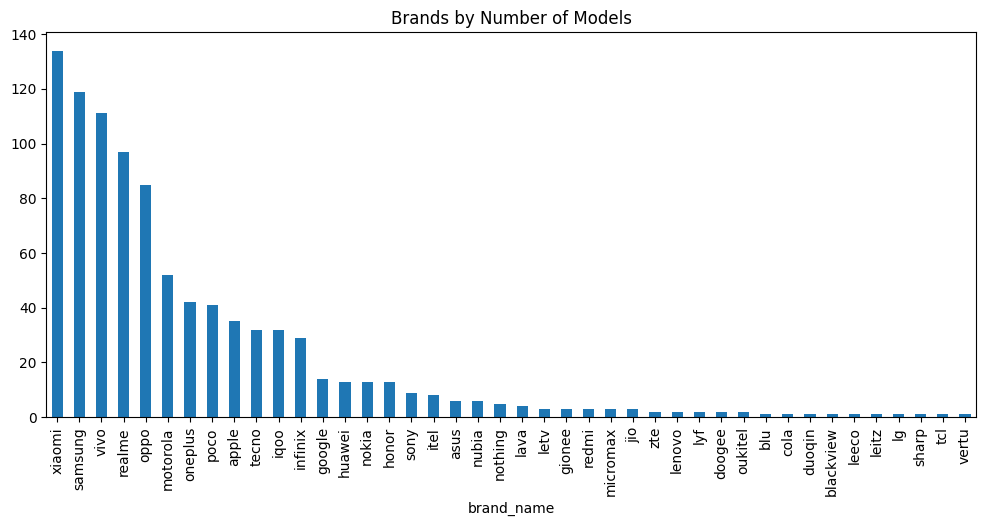

In [54]:
# Graph of brands having number of models
brand_counts = df['brand_name'].value_counts()
brand_counts.head(42).plot(kind='bar', figsize=(12,5), title='Brands by Number of Models')
# Xiomi, Samsung, and Vivo have 100+ models

In [200]:
# Top 5 most Expensive brands
top_expensive = df[['brand_name', 'model', 'price']].sort_values(by='price', ascending=False).head(5)
top_expensive = pd.DataFrame(top_expensive)
print("Top 5 Most Expensive Phones:\n")
top_expensive

Top 5 Most Expensive Phones:



,brand_name,model,price
732,vertu,Vertu Signature Touch,650000
909,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000
94,huawei,Huawei Mate 50 RS Porsche Design,239999
91,huawei,Huawei Mate 30 RS Porsche Design,214990
873,xiaomi,Xiaomi Mi Mix Alpha,199990


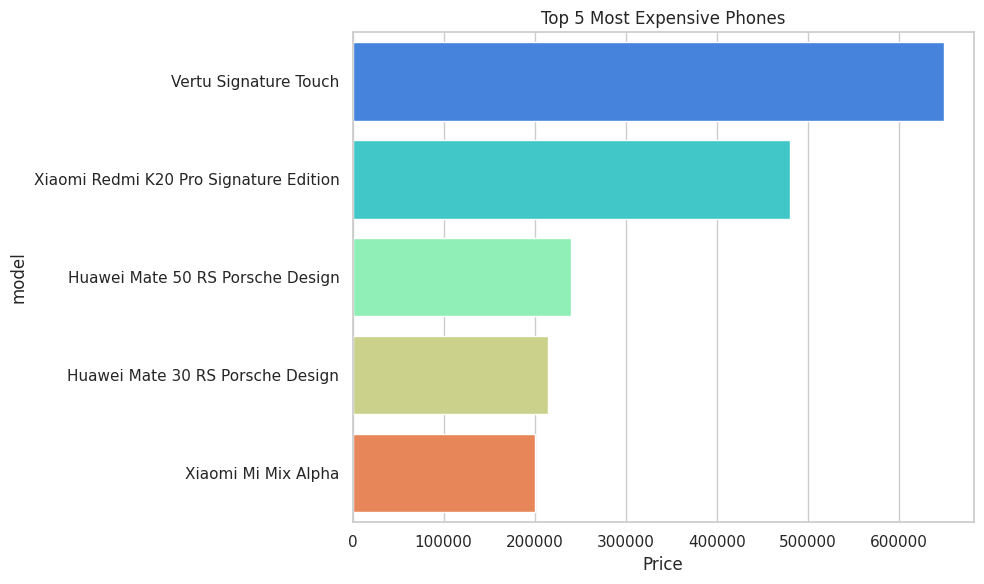

In [201]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_expensive,
    y='model',
    x='price',
    hue='model',
    palette='rainbow'
)

plt.title('Top 5 Most Expensive Phones')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

In [28]:
# Least liked models
least_rated_brands = df.sort_values(by='avg_rating')['brand_name'].unique()[:5]
least_rated_models = df[df['brand_name'].isin(least_rated_brands)][['brand_name','model','avg_rating']].sort_values(by='avg_rating').head(10)
least_rated_models.set_index(['brand_name', 'model'])


avg_rating
brand_name model                                            
vivo       Vivo Y01A                                     6.0
realme     Realme C30 (3GB RAM + 32GB)                   6.0
samsung    Samsung Galaxy M14                            6.0
xiaomi     Xiaomi Redmi A1 Plus                          6.0
infinix    Infinix Smart 6                               6.0
xiaomi     Xiaomi Redmi 9A                               6.1
vivo       Vivo Y02s                                     6.1
           Vivo Y01                                      6.1
xiaomi     Xiaomi Redmi A1 Plus (3GB RAM + 32GB)         6.1
           Xiaomi Redmi 9A Sport                         6.1

<Axes: title={'center': 'Average Price by Brand'}, xlabel='brand_name'>

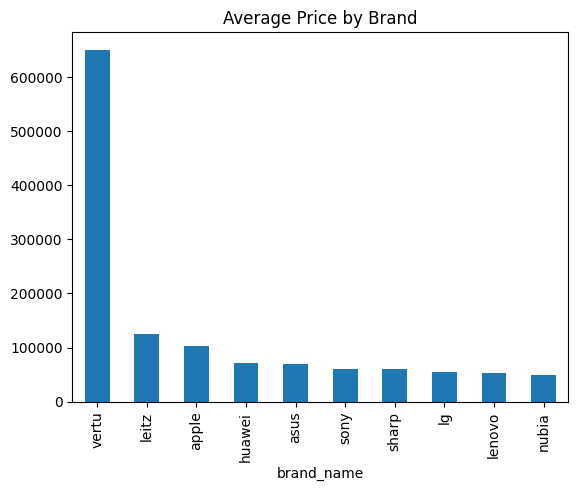

In [44]:
avg_price = df.groupby('brand_name')['price'].mean().sort_values(ascending=False).head(10)
avg_price.plot(kind='bar', title='Average Price by Brand')


# Analysis based on Smartphone features

In [74]:
# Top 10 5G smartphones
top_5g_rated = df[(df['5G_or_not'] == 1)].sort_values(by='avg_rating', ascending=False)
print(top_5g_rated[['brand_name', 'model', 'avg_rating', 'price']].head(10))

    brand_name                       model  avg_rating  price
979        zte        ZTE Axon 40 Ultra 5G         8.9  61990
693       sony         Sony Xperia 5 IV 5G         8.9  82199
849     xiaomi            Xiaomi 12 Pro 5G         8.9  50990
138       iqoo  iQOO 11 (16GB RAM + 256GB)         8.9  64999
136    infinix          Infinix Zero Ultra         8.9  36999
855     xiaomi                Xiaomi 13 5G         8.9  46990
854     xiaomi           Xiaomi 12T Pro 5G         8.9  59990
858     xiaomi                   Xiaomi 14         8.9  54999
69      google          Google Pixel 6 Pro         8.9  54300
708      tecno        Tecno Phantom X2 Pro         8.9  49999


In [79]:
# Top 10 Smartphones under 40K
top_5g_rated = df[(df['5G_or_not'] == 1) & (df['price']<40000)].sort_values(by='avg_rating', ascending=False)
print(top_5g_rated[['brand_name', 'model', 'avg_rating', 'price']].head(10))

    brand_name                                    model  avg_rating  price
136    infinix                       Infinix Zero Ultra         8.9  36999
599    samsung  Samsung Galaxy A53 5G (8GB RAM + 128GB)         8.9  33499
251   motorola                        Motorola Moto X40         8.9  39999
207   motorola                  Motorola Edge 30 Pro 5G         8.9  34999
597    samsung     Samsung Galaxy A53 (8GB RAM + 256GB)         8.9  36499
958     xiaomi            Xiaomi Redmi Note 12 Explorer         8.9  24999
658    samsung                 Samsung Galaxy S20 FE 5G         8.8  31239
272    nothing                          Nothing Phone 2         8.8  39990
206   motorola               Motorola Edge 30 Fusion 5G         8.8  39999
847     xiaomi     Xiaomi 11T Pro 5G (12GB RAM + 256GB)         8.8  38999


In [80]:
# OS used by brands
os_type = df['os'].unique()
print(os_type)


['ios' 'android' 'other']


In [180]:
os_by_brand = df.groupby('os')['brand_name'].unique()
for os, brands in os_by_brand.items():
    print(f"{os}")
    print(f"Total brands supporting {os}: {len(list(brands))} ")
    print(f"{list(brands)}")
    print()

android
Total brands supporting android: 41 
['asus', 'blackview', 'blu', 'cola', 'doogee', 'duoqin', 'gionee', 'google', 'honor', 'huawei', 'infinix', 'iqoo', 'itel', 'jio', 'lava', 'leeco', 'leitz', 'lenovo', 'letv', 'lg', 'lyf', 'micromax', 'motorola', 'nokia', 'nothing', 'nubia', 'oneplus', 'oppo', 'oukitel', 'poco', 'realme', 'redmi', 'samsung', 'sharp', 'sony', 'tcl', 'tecno', 'vertu', 'vivo', 'xiaomi', 'zte']

ios
Total brands supporting ios: 1 
['apple']

other
Total brands supporting other: 4 
['gionee', 'huawei', 'nokia', 'oppo']



In [81]:
# Top smartphones with powerful Battery
top_rated_powerphones = df[['brand_name', 'model', 'avg_rating', 'fast_charging', 'battery_capacity', 'price']]\
    .sort_values(by=['avg_rating', 'fast_charging', 'battery_capacity'], ascending=[False, False, False])\
    .drop_duplicates(subset='brand_name')\
    .head(5)

print("Phones with high performing battery\n")
for i, row in top_rated_powerphones.reset_index(drop=True).iterrows():
    print(f"{i+1}. {row['brand_name']} - {row['model']}")
    print(f"    Fast Charging: {row['fast_charging']}W | Battery: {row['battery_capacity']} mAh")
    print(f"    Price: ₹{int(row['price'])}\n")

Phones with high performing battery

1. iqoo - iQOO 11 Pro 5G
    Fast Charging: 200.0W | Battery: 4700.0 mAh
    Price: ₹58990

2. infinix - Infinix Zero Ultra
    Fast Charging: 180.0W | Battery: 4500.0 mAh
    Price: ₹36999

3. motorola - Motorola Edge 40 Pro 5G
    Fast Charging: 125.0W | Battery: 4800.0 mAh
    Price: ₹59990

4. lenovo - Lenovo Legion Pro 2
    Fast Charging: 120.0W | Battery: 5000.0 mAh
    Price: ₹59999

5. xiaomi - Xiaomi 12T Pro 5G
    Fast Charging: 120.0W | Battery: 5000.0 mAh
    Price: ₹59990



In [83]:
# Smartphones with high storage in least price
df['value_score'] = df['ram_capacity']/ df['price']
best_value = df.sort_values(by='value_score', ascending=False)[['brand_name', 'model', 'ram_capacity', 'price']].head(10)
print(best_value)


    brand_name                            model  ram_capacity  price
193       letv                 Letv Y1 Pro Plus             6   5999
497     realme                       Realme C2s             3   3499
62      gionee                   Gionee M12 Pro             6   7499
199        lyf                      Lyf Earth 2             3   3890
201   micromax  Micromax IN 2B (6GB RAM + 64GB)             6   7790
198        lyf                      Lyf Earth 1             3   3990
192       letv                      Letv Y1 Pro             4   5499
188      leeco                     LeEco S1 Pro             8  10999
754       vivo                         Vivo U3x             6   8990
724      tecno                    Tecno Spark 9             6   8999


In [195]:
# Different processors
processor_used= df['processor_brand'].value_counts()
processor_used

,count
processor_brand,
snapdragon,404
helio,200
dimensity,174
exynos,50
bionic,34
unisoc,26
tiger,24
google,9
kirin,6


In [197]:
print("Top 3 popular processors are: ")
for name , value in processor_used.head(3).items():
    print(name)

Top 3 popular processors are: 
snapdragon
helio
dimensity


In [43]:
# Top 10 high performing smartphones
df['ram_speed_combo'] = df['ram_capacity'] * df['processor_speed']
top_perf = df[df['num_cores']>=6].sort_values(by='ram_speed_combo', ascending=False)
print(top_perf[['brand_name', 'model']].head(10))


    brand_name                            model
49        asus          Asus ROG Phone 6 Pro 5G
51        asus                 Asus ROG Phone 7
138       iqoo       iQOO 11 (16GB RAM + 256GB)
48        asus  Asus ROG Phone 6 Batman Edition
402       oppo             OPPO Reno 9 Pro Plus
287    oneplus   OnePlus 10T (16GB RAM + 256GB)
385       oppo                 OPPO Reno 10 Pro
401       oppo               OPPO Reno 9 Pro 5G
190     lenovo              Lenovo Legion Pro 2
386       oppo            Oppo Reno 10 Pro Plus


Smartphones with best Camera Quality

In [33]:
df['total_camera'] = df['primary_camera_rear'] + df['primary_camera_front']
best_total_camera = df[['brand_name', 'model', 'primary_camera_rear', 'primary_camera_front','total_camera','avg_rating','price']].sort_values(by='total_camera', ascending=False).head(7)
best_total_camera.reset_index(drop=True, inplace=True)


In [38]:
print("Phone with Best Combined Camera:\n")
for i in range(len(best_total_camera)):
    print(f"{i+1}. {best_total_camera.loc[i, 'model']}\n"
          f"Rear Camera: {int(best_total_camera.loc[i, 'primary_camera_rear'])} MP | "
          f"Front Camera: {int(best_total_camera.loc[i, 'primary_camera_front'])} MP | "
          f"Rating: {best_total_camera.loc[i, 'avg_rating']} ⭐ | "
          f"Price: ₹{int(best_total_camera.loc[i, 'price'])}\n")


Phone with Best Combined Camera:

1. Samsung Galaxy S24 Ultra
Rear Camera: 200 MP | Front Camera: 60 MP | Rating: 8.5 ⭐ | Price: ₹119990

2. Motorola Edge 30 Ultra
Rear Camera: 200 MP | Front Camera: 60 MP | Rating: 8.0 ⭐ | Price: ₹54999

3. Motorola Moto Edge X30 Pro
Rear Camera: 200 MP | Front Camera: 60 MP | Rating: 8.0 ⭐ | Price: ₹59990

4. Motorola Moto X30 Pro
Rear Camera: 200 MP | Front Camera: 60 MP | Rating: 8.0 ⭐ | Price: ₹41990

5. Motorola Edge 30 Ultra (12GB RAM + 256GB)
Rear Camera: 200 MP | Front Camera: 60 MP | Rating: 8.0 ⭐ | Price: ₹59999

6. Honor 80 Pro Plus
Rear Camera: 200 MP | Front Camera: 50 MP | Rating: 8.0 ⭐ | Price: ₹54990

7. Nokia X60 Pro 5G
Rear Camera: 200 MP | Front Camera: 32 MP | Rating: 8.0 ⭐ | Price: ₹49990



# SmartPhones for Gaming

Top 5 smartphones for gaming

In [39]:
gaming_phones = df[
    (df['ram_capacity'] >= 8) &
    (df['num_cores'] >=8) &
    (df['processor_speed'] >= 2.8) &
    (df['refresh_rate'] >= 120) &
    (df['battery_capacity'] >= 5000)

]

top_gaming_phones = gaming_phones[['brand_name', 'model', 'ram_capacity', 'processor_speed',
                                   'refresh_rate', 'battery_capacity', 'avg_rating', 'price']]\
                    .sort_values(by=['processor_speed', 'ram_capacity', 'refresh_rate', 'avg_rating'],
                                 ascending=[False, False, False, False])\
                    .head(15)
top_gaming_phones = top_gaming_phones.drop_duplicates(subset='brand_name').head(41)

top_gaming_phones.reset_index(drop=True, inplace=True)

print("Best Gaming Phones:\n")
for i in range(len(top_gaming_phones)):
    phone = top_gaming_phones.loc[i]
    print(f"{i+1}. {phone['brand_name']} - {phone['model']}\n"
          f"    RAM: {phone['ram_capacity']} GB | Processor: {phone['processor_speed']} GHz | "
          f"Refresh Rate: {phone['refresh_rate']}Hz | Battery: {phone['battery_capacity']} mAh | "
          f"Rating: {phone['avg_rating']} ⭐ | Price: ₹{int(phone['price'])}\n")


Best Gaming Phones:

1. asus - Asus ROG Phone 6 Pro 5G
    RAM: 18 GB | Processor: 3.2 GHz | Refresh Rate: 165Hz | Battery: 6000.0 mAh | Rating: 8.8 ⭐ | Price: ₹89999

2. iqoo - iQOO 11 (16GB RAM + 256GB)
    RAM: 16 GB | Processor: 3.2 GHz | Refresh Rate: 144Hz | Battery: 5000.0 mAh | Rating: 8.9 ⭐ | Price: ₹64999

3. vivo - Vivo V27 Pro
    RAM: 12 GB | Processor: 3.2 GHz | Refresh Rate: 144Hz | Battery: 5000.0 mAh | Rating: 8.7 ⭐ | Price: ₹43999

4. oneplus - OnePlus 11 5G
    RAM: 12 GB | Processor: 3.2 GHz | Refresh Rate: 120Hz | Battery: 5000.0 mAh | Rating: 8.9 ⭐ | Price: ₹54999

5. xiaomi - Xiaomi 14
    RAM: 12 GB | Processor: 3.2 GHz | Refresh Rate: 120Hz | Battery: 5000.0 mAh | Rating: 8.9 ⭐ | Price: ₹54999

6. nubia - Nubia Red Magic 7S Pro
    RAM: 12 GB | Processor: 3.2 GHz | Refresh Rate: 120Hz | Battery: 5000.0 mAh | Rating: 8.6 ⭐ | Price: ₹60990

7. motorola - Motorola ThinkPhone
    RAM: 8 GB | Processor: 3.2 GHz | Refresh Rate: 144Hz | Battery: 5000.0 mAh | Rating: 8

Top 5 smartphones for gaming from different brands - Under 30K

In [41]:
gaming_phones = df[
    (df['ram_capacity'] >= 8) &
    (df['processor_speed'] >= 2.8) &
    (df['num_cores'] >= 8) &
    (df['refresh_rate'] >= 120) &
    (df['battery_capacity'] >= 5000) &
    (df['price'] <= 30000)
]

# Sort by best performance indicators
sorted_phones = gaming_phones.sort_values(
    by=['processor_speed', 'ram_capacity', 'refresh_rate', 'avg_rating'],
    ascending=[False, False, False, False]
)

# Drop duplicates to get one best phone per brand
top_gaming_phones = sorted_phones.drop_duplicates(subset='brand_name').head(41)

# Reset index
top_gaming_phones.reset_index(drop=True, inplace=True)

# Pretty print output
print("Best Gaming Phones Under ₹30,000:\n")
for i in range(len(top_gaming_phones)):
    phone = top_gaming_phones.loc[i]
    print(f"{i+1}. {phone['brand_name']} - {phone['model']}\n"
          f"   RAM: {phone['ram_capacity']} GB | Processor: {phone['processor_speed']} GHz | "
          f"Refresh Rate: {phone['refresh_rate']}Hz | Battery: {phone['battery_capacity']} mAh | "
          f"Rating: {phone['avg_rating']} ⭐ | Price: ₹{int(phone['price'])}\n")


Best Gaming Phones Under ₹30,000:

1. poco - POCO X5 GT
   RAM: 8 GB | Processor: 3.2 GHz | Refresh Rate: 144Hz | Battery: 5000.0 mAh | Rating: 8.4 ⭐ | Price: ₹29990

2. xiaomi - Xiaomi Redmi K60
   RAM: 8 GB | Processor: 3.2 GHz | Refresh Rate: 120Hz | Battery: 5500.0 mAh | Rating: 8.4 ⭐ | Price: ₹29990

3. realme - Realme GT Neo 3T (8GB RAM + 256GB)
   RAM: 8 GB | Processor: 3.2 GHz | Refresh Rate: 120Hz | Battery: 5000.0 mAh | Rating: 8.2 ⭐ | Price: ₹28499

4. iqoo - iQOO Neo 7 SE 5G
   RAM: 8 GB | Processor: 3.1 GHz | Refresh Rate: 120Hz | Battery: 5000.0 mAh | Rating: 8.3 ⭐ | Price: ₹24990

5. vivo - Vivo T2x 5G
   RAM: 8 GB | Processor: 3.0 GHz | Refresh Rate: 120Hz | Battery: 6000.0 mAh | Rating: 8.0 ⭐ | Price: ₹18990

6. oneplus - OnePlus Ace Racing Edition 5G
   RAM: 8 GB | Processor: 2.85 GHz | Refresh Rate: 120Hz | Battery: 5000.0 mAh | Rating: 8.3 ⭐ | Price: ₹22990

7. oppo - Oppo K10 Pro 5G
   RAM: 8 GB | Processor: 2.84 GHz | Refresh Rate: 120Hz | Battery: 5000.0 mAh | Ra